In [1]:
# burda hipt model icin agirliklar
!mkdir -p /kaggle/working/hipt/weights
!cp /kaggle/input/gereklilikler/vit256_small_dino.pth /kaggle/working/hipt/weights/


In [2]:
#sampath
!mkdir -p /kaggle/working/sam/weights

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -P /kaggle/working/sam/weights/


--2024-10-03 16:26:13--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.44, 18.238.176.19, 18.238.176.115, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: '/kaggle/working/sam/weights/sam_vit_b_01ec64.pth'

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   193MB/s    in 1.9s    

2024-10-03 16:26:15 (193 MB/s) - '/kaggle/working/sam/weights/sam_vit_b_01ec64.pth' saved [375042383/375042383]



In [3]:
# gerekli dizinlerin kurulmaıs
!mkdir -p /kaggle/working/results

In [4]:
!cp -r /kaggle/input/gereklilikler/weights_2/weights /kaggle/working/results


In [5]:
# bcss goruntuerinin tasinmasi

!mkdir -p /kaggle/working/merged_dataset_bcss
!cp -r /kaggle/input/gereklilikler/bcss_or/bcss_or /kaggle/working/merged_dataset_bcss/


In [6]:
# crag goruntuerinin tasinmasi
#/kaggle/working/cragg/merged-2
!mkdir -p /kaggle/working/cragg/merged-2
!cp -r /kaggle/input/gereklilikler/FOR_crag/FOR_crag /kaggle/working/cragg/merged-2/


In [16]:
# sampath
!mkdir -p /kaggle/working/SAMPath_b
!cp -r /kaggle/input/gereklilikler/SAMPath_b/SAMPath_b /kaggle/working/SAMPath_b



In [8]:
pwd

'/kaggle/working'

In [9]:
cd /kaggle/working/SAMPath_b/SAMPath_b

/kaggle/working/SAMPath_b/SAMPath_b


In [10]:
!pip -q install monai torchmetrics==0.11.4 pytorch_lightning==2.0.2 albumentations python-box wandb lightning jpeg4py einops

In [11]:
import wandb
wandb.login(key="api key")  # Kendi API anahtarınızı buraya ekleyin


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [12]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [61]:
!python main.py --config configs.BCSS --devices 0,1 --project sampath_end_o --name bcss_repeat_s


/opt/conda/lib/python3.10/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
{'batch_size': 6, 'accumulate_grad_batches': 2, 'num_workers': 4, 'out_dir': '/kaggle/working/results', 'opt': {'num_epochs': 32, 'learning_rate': 0.0001, 'weight_decay': 0.01, 'precision': 32, 'steps': [1800, 2088], 'warmup_steps': 72}, 'model': {'type': 'vit_b', 'checkpoint': '/kaggle/working/sam/weights/sam_vit_b_01ec64.pth', 'freeze': {'image_encoder': True, 'prompt_encoder': True, 'mask_decoder': False}, 'prompt_dim': 256, 'prompt_decoder': False, 'dense_prompt_decoder': False, 'extra_encoder': 'hipt', 'extra_type': 'fusion', 'extra_checkpoint': '/kaggle/working/hipt/weights/vit256_small_dino.pth'}, 'loss': {'focal_cof': 0.25, 'dice_cof': 0.75, 'ce_cof': 0.0, 'iou_c

In [26]:
import os
print(os.path.exists('/kaggle/working/merged_dataset_bcss/merged_dataset/img/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0.2500_0_3621.jpg'))


False


In [12]:
# Sonuçları zip formatına sıkıştır
#!zip -r /kaggle/working/results.zip /kaggle/working/results
!zip -r results.zip /kaggle/working/results/

# Dosyayı indirilebilir yapmak
from IPython.display import FileLink

FileLink(r'/kaggle/working/results.zip')


  adding: kaggle/working/results/ (stored 0%)
  adding: kaggle/working/results/wandb/ (stored 0%)
  adding: kaggle/working/results/wandb/debug-internal.log (deflated 95%)
  adding: kaggle/working/results/wandb/debug.log (deflated 72%)
  adding: kaggle/working/results/wandb/latest-run/ (stored 0%)
  adding: kaggle/working/results/wandb/latest-run/run-0exe1x40.wandb (deflated 81%)
  adding: kaggle/working/results/wandb/latest-run/logs/ (stored 0%)
  adding: kaggle/working/results/wandb/latest-run/logs/debug-internal.log (deflated 95%)
  adding: kaggle/working/results/wandb/latest-run/logs/debug.log (deflated 72%)
  adding: kaggle/working/results/wandb/latest-run/logs/debug-core.log (deflated 61%)
  adding: kaggle/working/results/wandb/latest-run/files/ (stored 0%)
  adding: kaggle/working/results/wandb/latest-run/files/wandb-metadata.json (deflated 54%)
  adding: kaggle/working/results/wandb/latest-run/files/output.log (deflated 83%)
  adding: kaggle/working/results/wandb/latest-run/file

/kaggle/working/results.zip

In [13]:
pwd

'/kaggle/working/SAMPath_b/SAMPath_b'

# predict

In [13]:
# sampath bcss 
#!mkdir -p /kaggle/working/predict/bcss
!cp -r /kaggle/input/gereklilikler/tahmin/tahmin/d /kaggle/working/predict/



In [68]:
# sampath bcss 
!mkdir -p /kaggle/working/results/yr
!cp -r /kaggle/input/gereklilikler/yr/yr /kaggle/working/results/yr



In [17]:
cd /kaggle/input/gereklilikler/SAMPath_b/SAMPath_b

/kaggle/input/gereklilikler/SAMPath_b/SAMPath_b


In [14]:
!mkdir -p /kaggle/working/predict/tahmin_sonuclari


In [29]:
rm -rf /kaggle/working/predict/tahmin_sonuclari/*


In [30]:
import torch.distributed as dist

if dist.is_initialized():
    dist.destroy_process_group()


In [18]:
"""
Sampath predict for bcss data
"""

#/kaggle/working/results/sampath/ofs18t0g/checkpoints/epoch=59-step=720.ckpt
#/kaggle/working/results/sampath_end/0exe1x40/checkpoints/epoch=31-step=2304.ckpt
## /Users/sidar/Downloads/kaggle 6/working/results/sampath_end/0exe1x40/checkpoints/epoch=31-step=2304.ckpt
!python predict.py --config configs.BCSS --input_dir /kaggle/working/predict --data_ext .jpg --output_dir /kaggle/working/predict/tahmin_sonuclari --pretrained /kaggle/working/results/weights/epoch=31-step=2304.ckpt  --devices 0,1

/opt/conda/lib/python3.10/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
{'batch_size': 6, 'accumulate_grad_batches': 2, 'num_workers': 4, 'out_dir': '/kaggle/working/results', 'opt': {'num_epochs': 32, 'learning_rate': 0.0001, 'weight_decay': 0.01, 'precision': 32, 'steps': [1800, 2088], 'warmup_steps': 72}, 'model': {'type': 'vit_b', 'checkpoint': '/kaggle/working/sam/weights/sam_vit_b_01ec64.pth', 'freeze': {'image_encoder': True, 'prompt_encoder': True, 'mask_decoder': False}, 'prompt_dim': 256, 'prompt_decoder': False, 'dense_prompt_decoder': False, 'extra_encoder': 'hipt', 'extra_type': 'fusion', 'extra_checkpoint': '/kaggle/working/hipt/weights/vit256_small_dino.pth'}, 'loss': {'focal_cof': 0.25, 'dice_cof': 0.75, 'ce_cof': 0.0, 'iou_c

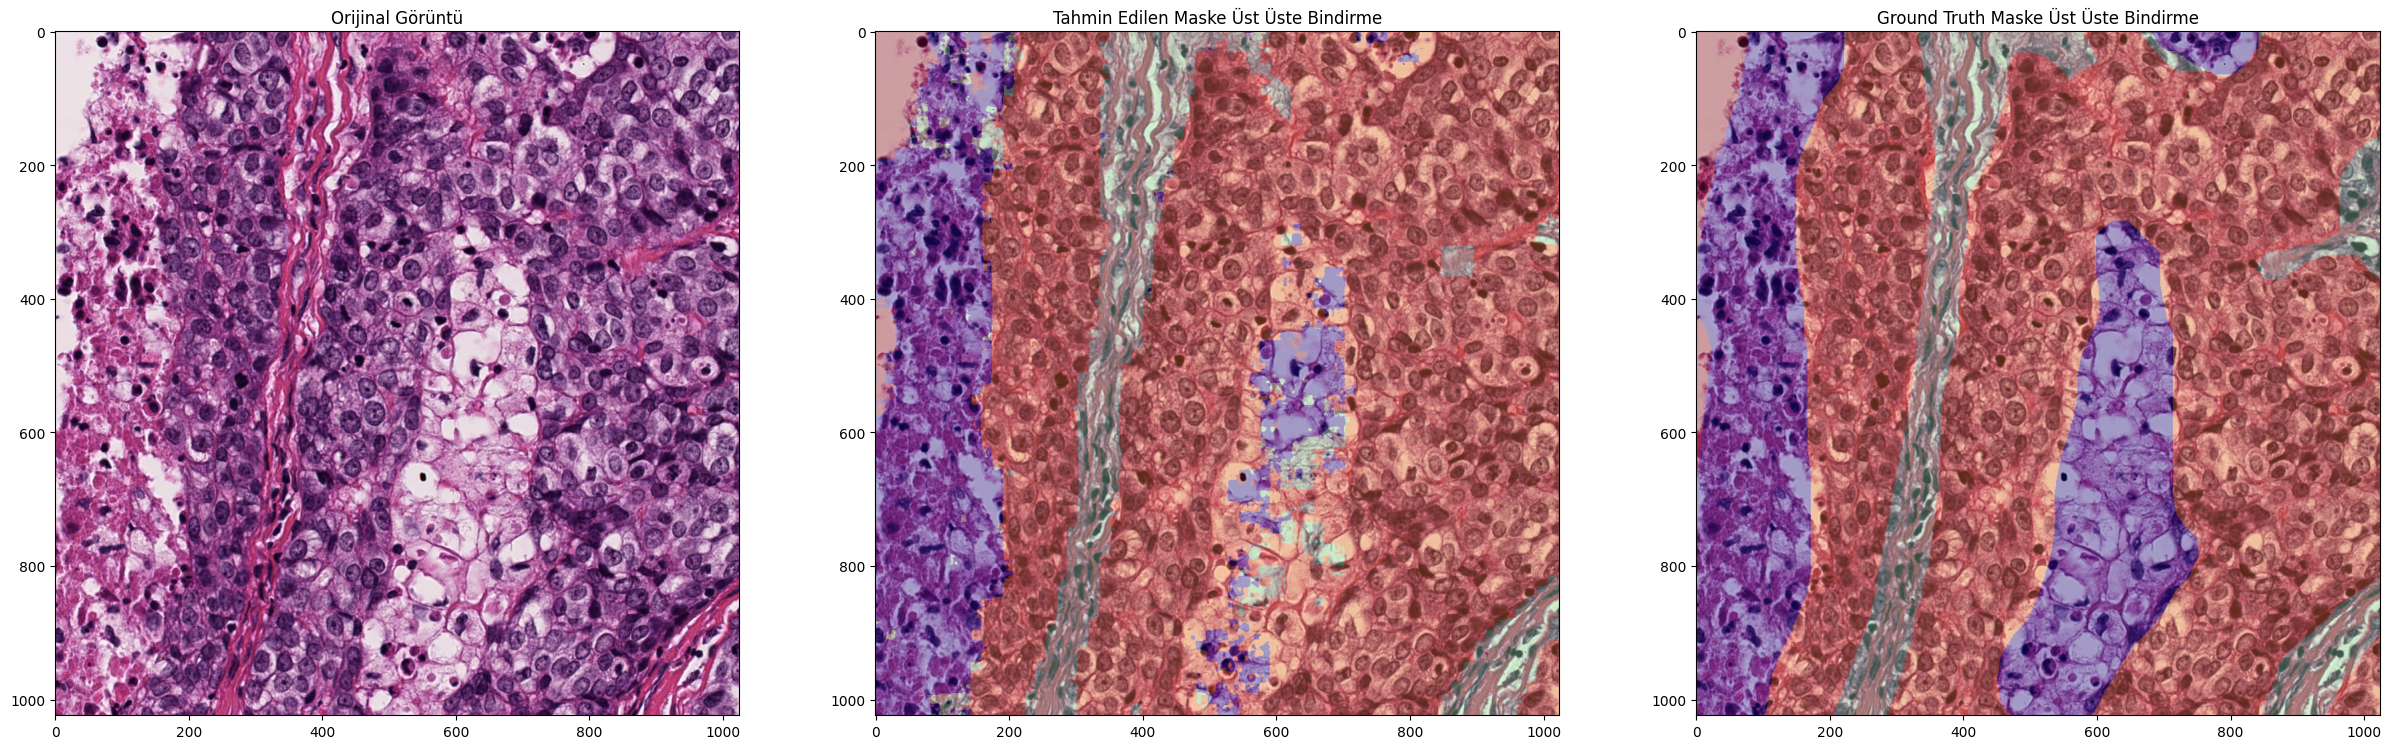

In [27]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Tahmin edilen maske ve orijinal görüntüyü yükleyin
predicted_mask = cv2.imread('/kaggle/working/predict/tahmin_sonuclari/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0.2500_874_2652_mask.png', 0)  # Tahmin edilen maske
original_image = cv2.imread('/kaggle/working/predict/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0.2500_874_2652.jpg')  # Orijinal görüntü

# Ground truth maskesini yükleyin
ground_truth_mask = cv2.imread('/kaggle/working/merged_dataset_bcss/bcss_or/mask/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0.2500_874_2652.png', 0)  # Ground truth maske

# Orijinal görüntünün boyutlarını alın
original_height, original_width = original_image.shape[:2]

# Maskeleri orijinal görüntü boyutuna yeniden boyutlandıralım
predicted_mask = cv2.resize(predicted_mask, (original_width, original_height))
ground_truth_mask = cv2.resize(ground_truth_mask, (original_width, original_height))

# İki maskeyi de aynı aralıkta normalize edelim (0-255 arası değerlere getirelim)
min_val = min(np.min(predicted_mask), np.min(ground_truth_mask))  # En küçük değer
max_val = max(np.max(predicted_mask), np.max(ground_truth_mask))  # En büyük değer

predicted_mask = cv2.normalize(predicted_mask, None, 0, 255, cv2.NORM_MINMAX)
ground_truth_mask = cv2.normalize(ground_truth_mask, None, 0, 255, cv2.NORM_MINMAX)

# İki maskeye de aynı renk haritasını uygulayalım
colored_predicted_mask = cv2.applyColorMap(predicted_mask, cv2.COLORMAP_JET)
colored_gt_mask = cv2.applyColorMap(ground_truth_mask, cv2.COLORMAP_JET)

# Orijinal görüntü ve tahmin edilen maskeyi birleştirelim
blended_predicted_image = cv2.addWeighted(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), 0.7, colored_predicted_mask, 0.3, 0)

# Orijinal görüntü ve ground truth maskesini birleştirelim
blended_gt_image = cv2.addWeighted(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), 0.7, colored_gt_mask, 0.3, 0)

# Görüntüleri görselleştirelim
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

# Orijinal görüntü
ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Orijinal Görüntü')

# Üst üste bindirilmiş tahmin edilen maske görüntüsü
ax[1].imshow(blended_predicted_image)
ax[1].set_title('Tahmin Edilen Maske Üst Üste Bindirme')

# Üst üste bindirilmiş ground truth maske görüntüsü
ax[2].imshow(blended_gt_image)
ax[2].set_title('Ground Truth Maske Üst Üste Bindirme')

plt.show()


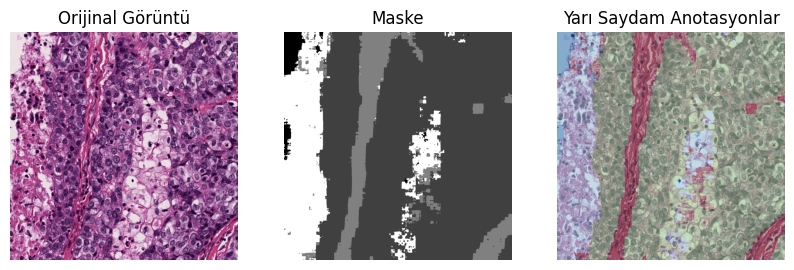

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Görüntü ve maske dosya yolları
image_path = "/kaggle/working/predict/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0.2500_874_2652.jpg"
mask_path = "/kaggle/working/predict/tahmin_sonuclari/TCGA-AN-A0XU-DX1_xmin26118_ymin18441_MPP-0.2500_874_2652_mask.png"  # Maskenin doğru dosya yolu

# Görüntüyü yükle
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV görüntüleri BGR formatında okur, bunu RGB'ye çevirelim

# Maskeyi yükle (grayscale modunda)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Şeffaflık oranı
alpha = 0.5  # Maskeli bölgelerin saydamlığı

# Maskede bulunan benzersiz sınıfları bulalım
unique_classes = np.unique(mask)

# Bir colormap (örneğin, viridis) kullanarak sınıflar için otomatik renk atama
# Colormap'ten alınan değerler 0 ile 1 arasında, bunu 0-255 aralığına çevirmeliyiz
colormap = plt.get_cmap('tab20', len(unique_classes))  # 'tab20', 'viridis', 'plasma', 'inferno' gibi temalar kullanılabilir

# 3 kanal renklendirilmiş maske (orijinal görüntü ile aynı boyutlarda)
colored_mask = np.zeros_like(image)

# Her sınıf için renk atama ve maskeyi renklendirme
for i, cls in enumerate(unique_classes):
    # Colormap'ten bir renk al ve 0-255 aralığına dönüştür
    color = np.array(colormap(i)[:3]) * 255  # İlk 3 değer RGB, sonuncu alpha (şeffaflık değeri)
    colored_mask[mask == cls] = color

# Mask olan bölgelerde alpha blending yap
blended_image = cv2.addWeighted(image, 1 - alpha, colored_mask, alpha, 0)

# Görüntüyü ve maskeyi görselleştir
plt.figure(figsize=(10, 10))

# Orijinal görüntü
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Orijinal Görüntü")
plt.axis("off")

# Maske
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Maske")
plt.axis("off")

# Sınıflar renklendirilmiş ve yarı saydam şekilde gösterilen görüntü
plt.subplot(1, 3, 3)
plt.imshow(blended_image)
plt.title("Yarı Saydam Anotasyonlar")
plt.axis("off")

plt.show()


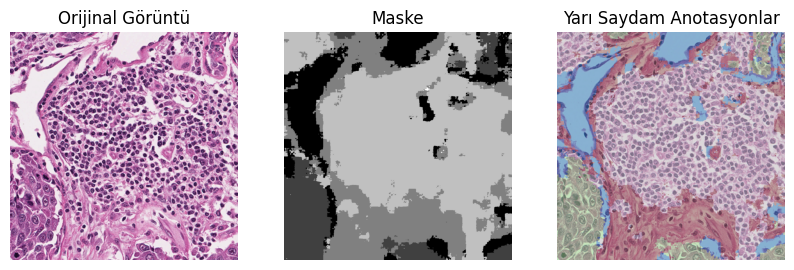

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Görüntü ve maske dosya yolları
image_path = "/kaggle/working/predict/d/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0.2500_0_0.jpg"
mask_path = "/kaggle/working/predict/TCGA-A2-A3XT-DX1_xmin83566_ymin29931_MPP-0.2500_0_0_mask.png"  # Maskenin doğru dosya yolu

# Görüntüyü yükle
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV görüntüleri BGR formatında okur, bunu RGB'ye çevirelim

# Maskeyi yükle (grayscale modunda)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Şeffaflık oranı
alpha = 0.5  # Maskeli bölgelerin saydamlığı

# Maskede bulunan benzersiz sınıfları bulalım
unique_classes = np.unique(mask)

# Bir colormap (örneğin, viridis) kullanarak sınıflar için otomatik renk atama
# Colormap'ten alınan değerler 0 ile 1 arasında, bunu 0-255 aralığına çevirmeliyiz
colormap = plt.get_cmap('tab20', len(unique_classes))  # 'tab20', 'viridis', 'plasma', 'inferno' gibi temalar kullanılabilir

# 3 kanal renklendirilmiş maske (orijinal görüntü ile aynı boyutlarda)
colored_mask = np.zeros_like(image)

# Her sınıf için renk atama ve maskeyi renklendirme
for i, cls in enumerate(unique_classes):
    # Colormap'ten bir renk al ve 0-255 aralığına dönüştür
    color = np.array(colormap(i)[:3]) * 255  # İlk 3 değer RGB, sonuncu alpha (şeffaflık değeri)
    colored_mask[mask == cls] = color

# Mask olan bölgelerde alpha blending yap
blended_image = cv2.addWeighted(image, 1 - alpha, colored_mask, alpha, 0)

# Görüntüyü ve maskeyi görselleştir
plt.figure(figsize=(10, 10))

# Orijinal görüntü
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Orijinal Görüntü")
plt.axis("off")

# Maske
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Maske")
plt.axis("off")

# Sınıflar renklendirilmiş ve yarı saydam şekilde gösterilen görüntü
plt.subplot(1, 3, 3)
plt.imshow(blended_image)
plt.title("Yarı Saydam Anotasyonlar")
plt.axis("off")

plt.show()


In [29]:
"""
Sampath predict for crag data
"""

#/kaggle/working/results/sampath/ofs18t0g/checkpoints/epoch=59-step=720.ckpt
#/kaggle/working/results/sampath_end/0exe1x40/checkpoints/epoch=31-step=2304.ckpt
## /Users/sidar/Downloads/kaggle 6/working/results/sampath_end/0exe1x40/checkpoints/epoch=31-step=2304.ckpt
!python predict.py --config configs.CRAG --input_dir /kaggle/working/cragg/merged-2/FOR_crag/tahmin --data_ext .png --output_dir /kaggle/working/predict --pretrained /kaggle/working/results/weights/epoch=59-step=720.ckpt  --devices 0,1

/opt/conda/lib/python3.10/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
{'batch_size': 6, 'num_workers': 4, 'out_dir': '/kaggle/working/results', 'opt': {'num_epochs': 60, 'learning_rate': 0.0001, 'weight_decay': 0.01, 'precision': 32, 'steps': [1150, 1265], 'warmup_steps': 46}, 'model': {'type': 'vit_b', 'checkpoint': '/kaggle/working/sam/weights/sam_vit_b_01ec64.pth', 'freeze': {'image_encoder': True, 'prompt_encoder': True, 'mask_decoder': False}, 'prompt_dim': 256, 'prompt_decoder': False, 'dense_prompt_decoder': False, 'extra_encoder': 'hipt', 'extra_type': 'fusion', 'extra_checkpoint': '/kaggle/working/hipt/weights/vit256_small_dino.pth'}, 'loss': {'focal_cof': 0.125, 'dice_cof': 0.875, 'ce_cof': 0.0, 'iou_cof': 0.0}, 'dataset': {'data

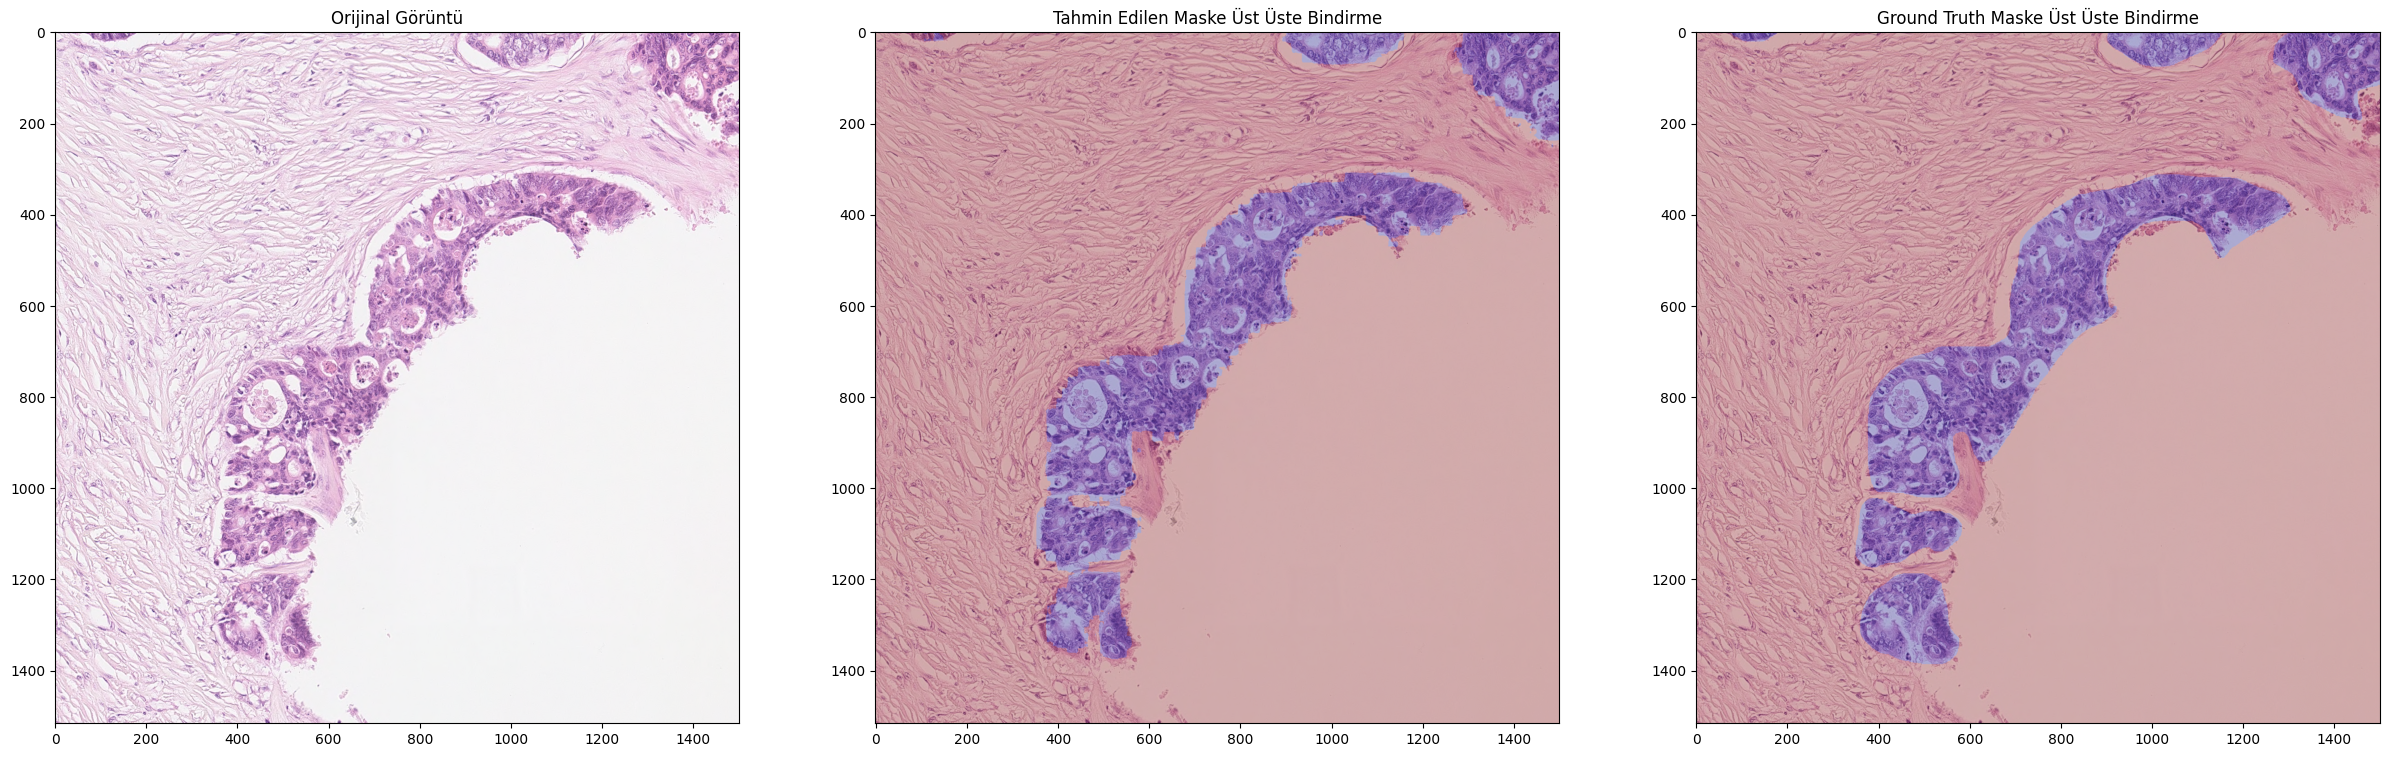

In [40]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Tahmin edilen maske ve orijinal görüntüyü yükleyin
predicted_mask = cv2.imread('/kaggle/working/predict/test_1_mask.png', 0)  # Tahmin edilen maske
original_image = cv2.imread('/kaggle/working/cragg/merged-2/FOR_crag/tahmin/test_1.png')  # Orijinal görüntü

# Ground truth maskesini yükleyin
ground_truth_mask = cv2.imread('/kaggle/working/cragg/merged-2/FOR_crag/mask/test_1.png', 0)  # Ground truth maske

# Orijinal görüntünün boyutlarını alın
original_height, original_width = original_image.shape[:2]

# Maskeleri orijinal görüntü boyutuna yeniden boyutlandıralım
predicted_mask = cv2.resize(predicted_mask, (original_width, original_height))
ground_truth_mask = cv2.resize(ground_truth_mask, (original_width, original_height))

# Maskeleri normalize edelim (0-255 arası değerlere getirelim)
predicted_mask = cv2.normalize(predicted_mask, None, 0, 255, cv2.NORM_MINMAX)
ground_truth_mask = cv2.normalize(ground_truth_mask, None, 0, 255, cv2.NORM_MINMAX)

# Tahmin edilen maskeyi renkli hale getirelim
colored_predicted_mask = cv2.applyColorMap(predicted_mask, cv2.COLORMAP_JET)
colored_gt_mask = cv2.applyColorMap(ground_truth_mask, cv2.COLORMAP_JET)

# Orijinal görüntü ve tahmin edilen maskeyi birleştirelim
blended_predicted_image = cv2.addWeighted(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), 0.7, colored_predicted_mask, 0.3, 0)

# Orijinal görüntü ve ground truth maskesini birleştirelim
blended_gt_image = cv2.addWeighted(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), 0.7, colored_gt_mask, 0.3, 0)

# Görüntüleri görselleştirelim
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

# Orijinal görüntü
ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Orijinal Görüntü')

# Üst üste bindirilmiş tahmin edilen maske görüntüsü
ax[1].imshow(blended_predicted_image)
ax[1].set_title('Tahmin Edilen Maske Üst Üste Bindirme')

# Üst üste bindirilmiş ground truth maske görüntüsü
ax[2].imshow(blended_gt_image)
ax[2].set_title('Ground Truth Maske Üst Üste Bindirme')

plt.show()
